In [1]:
from sensor import sensor as sens
from actuator import actuator as act
from threshold import threshold as thr
from manager import manager
from signal_input import signal_input
import wire
from graphviz import Source, render

In [2]:
#Create manager that holds the threshold device
mng = manager(verbose = True)
#Create an input node
inp = signal_input()
#Create threshold nodes
t1 = thr(mng,1)
t2 = thr(mng,1)
t3 = thr(mng,2)
t4 = thr(mng,2)
t5 = thr(mng,1)
#Create output node/actuator
out = act(mng)

In [3]:
#Define connections between nodes 0-activate , 1-inhibit
t1.add_consumer(t2,1)# t1 --| t2
t2.add_consumer(t3,0)# t2 --> t3
t3.add_consumer(t4,0)# t3 --> t4
t4.add_consumer(t5,0)# t4 --> t5
t5.add_consumer(out,0)# t5 --> t_out
inp.add_consumer(t1)# tin --> t1
inp.add_consumer(t2)# tin --> t2
inp.add_consumer(t3)# tin --> t3
inp.add_consumer(t4)# tin --> t4
inp.add_consumer(t5,1)# tin --| t5

In [4]:
#Threshold node names
[t1.name, t2.name, t3.name, t4.name, t5.name]

['thr_X5NF', 'thr_0BCA', 'thr_8KMW', 'thr_PCLI', 'thr_6Q8M']

In [5]:
#Current node values
[t1.current, t2.current, t3.current, t4.current, t5.current]

[0, 0, 0, 0, 0]

In [6]:
#Display connections --> activation, --| inhibition.
mng.display()

thr_X5NF --| thr_0BCA with : wire_LWT7
thr_0BCA --> thr_8KMW with : wire_23FC
thr_8KMW --> thr_PCLI with : wire_O8RO
thr_PCLI --> thr_6Q8M with : wire_GEZP
thr_6Q8M --> act_OSPD with : wire_YT71


In [7]:
#Generate the DOT representation of the manager/t. device
dot = mng.dot_generator(inp)
#Read the DOT file with graphviz
src = Source(dot)
#Create and save the graph
src.render(filename='test_network', directory='test-demo', format='png', cleanup=True) 

digraph "device"{ graph [rankdir=LR] node [shape=circle] inp [color=black style=filled shape=circle label="" width=0.25] thr_X5NF [label ="1"] thr_0BCA [label ="1"] thr_8KMW [label ="2"] thr_PCLI [label ="2"] thr_6Q8M [label ="1"] thr_X5NF -> thr_0BCA [arrowhead="tee"] thr_0BCA -> thr_8KMW [arrowhead="rnormal"] thr_8KMW -> thr_PCLI [arrowhead="rnormal"] thr_PCLI -> thr_6Q8M [arrowhead="rnormal"] thr_6Q8M -> act_OSPD [arrowhead="rnormal"] inp -> thr_X5NF [arrowhead="rnormal"] inp -> thr_0BCA [arrowhead="rnormal"] inp -> thr_8KMW [arrowhead="rnormal"] inp -> thr_PCLI [arrowhead="rnormal"] inp -> thr_6Q8M [arrowhead="tee"]}


'test-demo\\test_network.png'

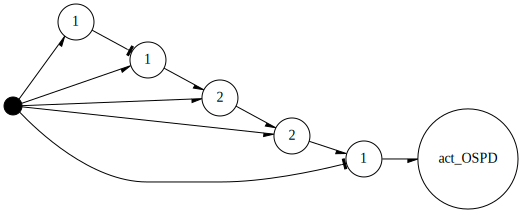

In [8]:
src

In [9]:
print(f"Initial thresholds : \n{mng.get_thresholds()}")

for i in range(3):
    #Send a signal
    inp.signal()
    #Combined update
    mng.update()
    
#Pause update without signal/signal=0
mng.update()
print(f"Final thresholds at time {mng.time} : \n{mng.get_thresholds()}")

Initial thresholds : 
[0, 0, 0, 0, 0]
Thresholds at time 0 after the signal: 
[1, 1, 1, 1, -1]
Threshold outputs at time 0
thr_X5NF --| wire_LWT7
thr_0BCA --> wire_23FC
Thresholds at time 0 after threshold update: 
[0, 0, 0, 0, 0]
Wire outputs at time 0
thr_X5NF --| thr_0BCA with : wire_LWT7
thr_0BCA --> thr_8KMW with : wire_23FC
thr_8KMW --- thr_PCLI with : wire_O8RO
thr_PCLI --- thr_6Q8M with : wire_GEZP
thr_6Q8M --- act_OSPD with : wire_YT71
Thresholds at time 0 after wire update: 
[0, -1, 1, 0, 0]
Thresholds at time 1 after the signal: 
[1, 0, 2, 1, -1]
Threshold outputs at time 1
thr_X5NF --| wire_LWT7
thr_8KMW --> wire_O8RO
Thresholds at time 1 after threshold update: 
[0, 0, 0, 0, 0]
Wire outputs at time 1
thr_X5NF --| thr_0BCA with : wire_LWT7
thr_0BCA --- thr_8KMW with : wire_23FC
thr_8KMW --> thr_PCLI with : wire_O8RO
thr_PCLI --- thr_6Q8M with : wire_GEZP
thr_6Q8M --- act_OSPD with : wire_YT71
Thresholds at time 1 after wire update: 
[0, -1, 0, 1, 0]
Thresholds at time 2 aft